<a href="https://colab.research.google.com/github/berlisuharmanto/Credit-Risk-Loan/blob/main/Rakamin_Academy_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rakamin ID/X Partner Final Project**
Berli Suharmanto

In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [157]:
pd.set_option("display.max_columns", 500)

In [158]:
df = pd.read_csv("/content/drive/MyDrive/Rakamin/loan_data_2007_2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [159]:
df.head

<bound method NDFrame.head of         Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500

In [160]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [161]:
df.duplicated().sum()

0

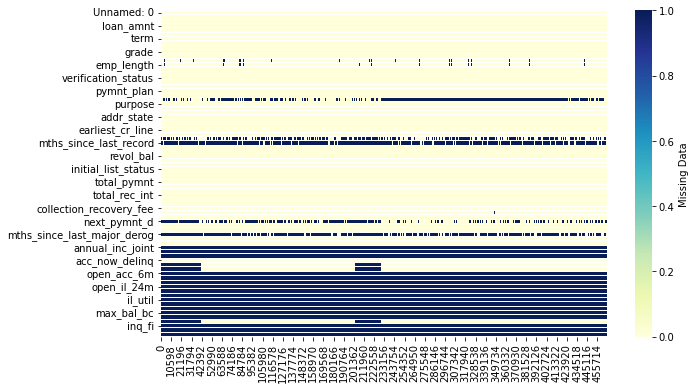

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [163]:
df.corr()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
Unnamed: 0,1.000000,0.493963,0.503014,0.075282,0.080043,0.090814,0.033313,0.070622,0.026413,0.097809,0.063351,-0.025976,-0.023999,-0.103224,0.092801,0.102835,0.005550,0.011329,0.077378,0.286977,0.286986,-0.140652,-0.129300,-0.145491,-0.048047,-0.033899,-0.036249,-0.015140,-0.025864,0.046954,0.027068,NaN,NaN,NaN,NaN,0.019520,0.006304,0.003367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003080,NaN,NaN,NaN
id,0.493963,1.000000,0.997299,0.067542,0.071149,0.080057,-0.030501,0.039863,0.024231,0.130291,0.072024,-0.085182,-0.033934,-0.127121,0.099886,0.105560,0.028976,-0.011012,0.074346,0.445555,0.445651,-0.284595,-0.275468,-0.278272,-0.144487,-0.042162,-0.066162,-0.030594,-0.078282,0.056528,0.027466,NaN,NaN,NaN,NaN,0.026759,0.004007,0.007574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023957,NaN,NaN,NaN
member_id,0.503014,0.997299,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024921,0.129867,0.072536,-0.086382,-0.034022,-0.122521,0.099950,0.107664,0.028793,-0.010093,0.074462,0.447998,0.448092,-0.282848,-0.273351,-0.277070,-0.142031,-0.043115,-0.066358,-0.030748,-0.076851,0.056772,0.027791,NaN,NaN,NaN,NaN,0.026981,0.004088,0.007827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818,NaN,NaN,NaN
loan_amnt,0.075282,0.067542,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,-0.020328,-0.041361,0.011523,0.204182,-0.081137,0.331423,0.117756,0.235262,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,-0.008067,-0.066374,NaN,NaN,NaN,NaN,0.006283,-0.002859,0.332686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290208,NaN,NaN,NaN
funded_amnt,0.080043,0.071149,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,-0.020970,-0.041443,0.011622,0.204983,-0.080593,0.331039,0.118885,0.235135,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,-0.007822,-0.066359,NaN,NaN,NaN,NaN,0.006472,-0.002859,0.332683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290206,NaN,NaN,NaN
funded_amnt_inv,0.090814,0.080057,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367806,0.062606,0.008143,-0.027580,-0.036670,0.056884,0.205807,-0.078894,0.327436,0.120774,0.235456,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,-0.007175,-0.066301,NaN,NaN,NaN,NaN,0.006801,-0.002858,0.332677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290185,NaN,NaN,NaN
int_rate,0.033313,-0.030501,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046072,0.159657,0.079190,0.205641,-0.046605,-0.008992,0.012307,0.066695,-0.004589,0.323365,-0.033012,0.137427,0.137451,0.127035,0.129166,-0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020306,-0.006686,NaN,NaN,NaN,NaN,0.030338,0.000863,-0.097316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.146838,NaN,NaN,NaN
installment,0.070622,0.039863,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017001,0.002247,-0.045757,-0.002599,0.196839,-0.070093,0.320239,0.136852,0.215906,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,-0.006055,-0.066462,NaN,NaN,NaN,NaN,0.008923,-0.002359,0.300639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270074,NaN,NaN,NaN
annual_inc,0.026413,0.024231,0.02492

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [165]:
df.drop(columns=['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'], axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,

In [166]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [167]:
unsure = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

df = df[df.loan_status.isin(unsure) == False]

df['loan_type'] = np.where(df['loan_status'].isin(good_loan), 'safe', 'risky')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [168]:
leakages = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

df.drop(columns=leakages, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
df.drop(columns=['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [170]:
df.loan_type.value_counts()

safe     186727
risky     52186
Name: loan_type, dtype: int64

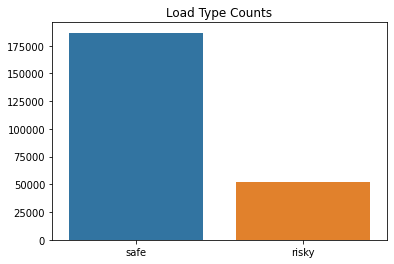

In [171]:
plt.title('Load Type Counts')
sns.barplot(x=df.loan_type.value_counts().index,y=df.loan_type.value_counts().values)

As we can see the data we get is quite imbalance just how much far the number between them

In [172]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["loan_type"] = label_encoder.fit_transform(df["loan_type"])
df["loan_type"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         1
1         0
2         1
3         1
5         1
         ..
466276    0
466277    0
466278    1
466281    0
466283    1
Name: loan_type, Length: 238913, dtype: int64

In [173]:
df.loan_type.value_counts()

1    186727
0     52186
Name: loan_type, dtype: int64

In [174]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [175]:
df.corr()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_type
Unnamed: 0,1.000000,0.092534,0.101075,0.098756,0.023004,0.120171,0.067826,-0.019218,-0.016990,-0.042085,0.114255,0.126348,-0.000138,0.022348,0.100008,0.051923,0.036332,NaN,NaN,NaN,NaN,0.023226,0.006510,0.003883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004503,NaN,NaN,NaN,-0.068487
loan_amnt,0.092534,1.000000,0.213034,0.955487,0.351752,0.059806,0.012633,-0.005147,-0.035943,0.050370,0.203816,-0.072847,0.318893,0.104894,0.238034,-0.000655,-0.071015,NaN,NaN,NaN,NaN,0.013025,-0.002194,0.317875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.349787,NaN,NaN,NaN,-0.074628
int_rate,0.101075,0.213034,1.000000,0.202959,-0.019188,0.172882,0.101608,0.199684,-0.059043,0.017354,0.047026,0.087202,0.023753,0.355853,-0.005726,0.030200,-0.012963,NaN,NaN,NaN,NaN,0.032351,0.000815,-0.106682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.173980,NaN,NaN,NaN,-0.255543
installment,0.098756,0.955487,0.202959,1.000000,0.348475,0.061341,0.024708,0.008567,-0.041015,0.031928,0.200891,-0.062807,0.312439,0.134611,0.220290,0.001283,-0.071175,NaN,NaN,NaN,NaN,0.015691,-0.001765,0.286543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324213,NaN,NaN,NaN,-0.055635
annual_inc,0.023004,0.351752,-0.019188,0.348475,1.000000,-0.176951,0.055639,0.057863,-0.054251,-0.078688,0.152174,-0.019310,0.320946,0.025735,0.224851,0.004726,-0.070776,NaN,NaN,NaN,NaN,0.017159,0.002535,0.475417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329248,NaN,NaN,NaN,0.060564
dti,0.120171,0.059806,0.172882,0.061341,-0.176951,1.000000,0.000712,-0.004624,0.016716,0.102958,0.312839,-0.033117,0.149991,0.226704,0.235522,0.004551,0.034580,NaN,NaN,NaN,NaN,0.010361,-0.004010,-0.018833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061768,NaN,NaN,NaN,-0.128055
delinq_2yrs,0.067826,0.012633,0.101608,0.024708,0.055639,0.000712,1.000000,0.022205,-0.567028,-0.053298,0.061116,-0.005041,-0.030886,-0.014513,0.130872,0.040696,-0.436440,NaN,NaN,NaN,NaN,0.109577,-0.000604,0.067757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038597,NaN,NaN,NaN,-0.030770
inq_last_6mths,-0.019218,-0.005147,0.199684,0.008567,0.057863,-0.004624,0.022205,1.000000,-0.009669,-0.155063,0.099412,0.040047,-0.004116,-0.090387,0.125011,-0.000129,0.007527,NaN,NaN,NaN,NaN,-0.004361,0.001077,0.071896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024834,NaN,NaN,NaN,-0.055262
mths_since_last_delinq,-0.016990,-0.035943,-0.059043,-0.041015,-0.054251,0.016716,-0.567028,-0.009669,1.000000,0.139586,-0.032919,0.084056,-0.024055,0.034738,-0.051446,-0.031823,0.733449,NaN,NaN,NaN,NaN,-0.115881,0.003513,-0.095546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043876,NaN,NaN,NaN,0.027424
mths_since_last_record,-0.042085,0.050370,0.017354,0.031928,-0.078688,0.102958,-0.053298,-0.155063,0.139586,1.000000,0.016805,-0.036814,-0.031888,0.131847,-0.175012,-0.007451,-0.024466,NaN,NaN,NaN,NaN,-0.016162,-0.072374,0.008071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009010,NaN,NaN,NaN,-0.017679


In [176]:
df.isnull().sum()

Unnamed: 0                          0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13478
emp_length                       9225
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
title                              15
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         133528
mths_since_last_record         209964
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        232
total_acc   

# **Dropping Column with Obvious Nothing to Do with The Data Since It's Only Contain NaN**

In [177]:
df.drop(columns=['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',  'total_cu_tl', 'inq_last_12m'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [178]:
df.isnull().sum()

Unnamed: 0                          0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13478
emp_length                       9225
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
title                              15
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         133528
mths_since_last_record         209964
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        232
total_acc   

In [179]:
df.emp_title.value_counts()

Teacher                          1652
Manager                          1622
RN                                715
Supervisor                        712
Registered Nurse                  712
                                 ... 
COLDWELL BANKER                     1
the hospital of central conn        1
Powhatan County Schools             1
PhyAmerica Government Service       1
Server Engineer Lead                1
Name: emp_title, Length: 129889, dtype: int64

In [180]:
df.earliest_cr_line.value_counts()

Oct-00    2033
Oct-99    1890
Nov-00    1856
Oct-01    1848
Nov-99    1819
          ... 
Oct-58       1
Dec-60       1
May-62       1
Mar-65       1
Nov-56       1
Name: earliest_cr_line, Length: 634, dtype: int64

Text(0.5, 0, 'Loan Amount')

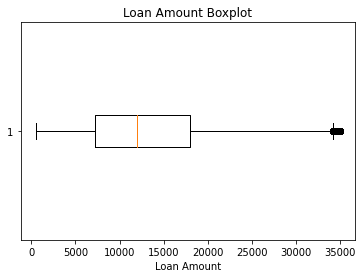

In [181]:
plt.boxplot(df['loan_amnt'], vert=False)
plt.title("Loan Amount Boxplot")
plt.xlabel('Loan Amount')

In [182]:
df.last_credit_pull_d.value_counts()

Jan-16    101680
Dec-15     13779
Nov-15      8238
Sep-15      7982
Oct-15      7848
           ...  
Nov-07         3
May-08         1
Jun-08         1
Jul-08         1
Jul-07         1
Name: last_credit_pull_d, Length: 103, dtype: int64

Text(0.5, 0, 'Int rate')

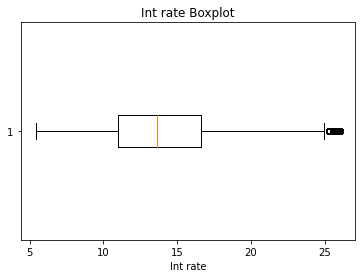

In [183]:
plt.boxplot(df['int_rate'], vert=False)
plt.title("Int rate Boxplot")
plt.xlabel('Int rate')

In [184]:
df.emp_length.value_counts()

10+ years    71312
2 years      22352
< 1 year     19998
3 years      19395
5 years      17297
1 year       16078
4 years      15402
6 years      14300
7 years      13466
8 years      11092
9 years       8996
Name: emp_length, dtype: int64

In [185]:
df.emp_length = df.emp_length.astype('str')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [186]:
df.emp_length.dtypes

dtype('O')

In [187]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [188]:
import re
df.emp_length = [re.sub('[^0-9]', '', x) for x in df.emp_length]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [189]:
df.emp_length.value_counts()

10    71312
1     36076
2     22352
3     19395
5     17297
4     15402
6     14300
7     13466
8     11092
       9225
9      8996
Name: emp_length, dtype: int64

In [190]:
df.emp_length = pd.to_numeric(df.emp_length)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [191]:
df.emp_length.replace(np.nan, df.emp_length.astype("float").mean(axis=0), inplace=True)
df.annual_inc.replace(np.nan, df.annual_inc.astype("float").mean(axis=0), inplace=True)
df.delinq_2yrs.replace(np.nan, df.delinq_2yrs.astype("float").mean(axis=0), inplace=True)
df.inq_last_6mths.replace(np.nan, df.inq_last_6mths.astype("float").mean(axis=0), inplace=True)
df.mths_since_last_delinq.replace(np.nan, df.mths_since_last_delinq.astype("float").mean(axis=0), inplace=True)
df.mths_since_last_record.replace(np.nan, df.mths_since_last_record.astype("float").mean(axis=0), inplace=True)
df.open_acc.replace(np.nan, df.open_acc.astype("float").mean(axis=0), inplace=True)
df.pub_rec.replace(np.nan, df.pub_rec.astype("float").mean(axis=0), inplace=True)
df.revol_util.replace(np.nan, df.revol_util.astype("float").mean(axis=0), inplace=True)
df.total_acc.replace(np.nan, df.total_acc.astype("float").mean(axis=0), inplace=True)
df.collections_12_mths_ex_med.replace(np.nan, df.collections_12_mths_ex_med.astype("float").mean(axis=0), inplace=True)
df.mths_since_last_major_derog.replace(np.nan, df.mths_since_last_major_derog.astype("float").mean(axis=0), inplace=True)
df.acc_now_delinq.replace(np.nan, df.acc_now_delinq.astype("float").mean(axis=0), inplace=True)
df.tot_coll_amt.replace(np.nan, df.tot_coll_amt.astype("float").mean(axis=0), inplace=True)
df.tot_cur_bal.replace(np.nan, df.tot_cur_bal.astype("float").mean(axis=0), inplace=True)
df.total_rev_hi_lim.replace(np.nan, df.total_rev_hi_lim.astype("float").mean(axis=0), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [192]:
df.emp_title.replace(np.nan, df.emp_title.value_counts().idxmax(), inplace=True)
df.title.replace(np.nan, df.title.value_counts().idxmax(), inplace=True)
df.earliest_cr_line.replace(np.nan, df.earliest_cr_line.value_counts().idxmax(), inplace=True)
df.last_credit_pull_d.replace(np.nan, df.last_credit_pull_d.value_counts().idxmax(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [193]:
df.isnull().sum()

Unnamed: 0                     0
loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
last_credit_pull_d             0
collections_12_mths_ex_med     0
mths_since

In [194]:
df.purpose.value_counts()

debt_consolidation    139085
credit_card            47640
home_improvement       13891
other                  13705
major_purchase          5974
small_business          4799
car                     3505
medical                 2714
wedding                 2017
moving                  1900
house                   1537
vacation                1468
educational              422
renewable_energy         256
Name: purpose, dtype: int64

In [195]:
df.addr_state.value_counts()

CA    40550
NY    20608
TX    18161
FL    16647
NJ     9243
IL     8806
PA     8071
GA     7574
VA     7549
OH     7333
NC     6459
MA     5912
AZ     5686
MD     5680
MI     5571
WA     5507
CO     5184
MN     4122
MO     3795
CT     3554
NV     3553
OR     3096
AL     2973
WI     2883
LA     2783
SC     2659
IN     2524
TN     2238
KY     2140
OK     2016
KS     1960
UT     1942
AR     1670
HI     1373
NM     1288
NH     1094
WV     1080
RI     1025
DC      794
MT      713
AK      633
DE      628
WY      559
SD      514
VT      398
MS      325
NE       14
IA       13
ID        9
ME        4
Name: addr_state, dtype: int64

In [196]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [197]:
df.grade.value_counts()

B    72239
C    61042
A    39500
D    38715
E    18086
F     7348
G     1983
Name: grade, dtype: int64

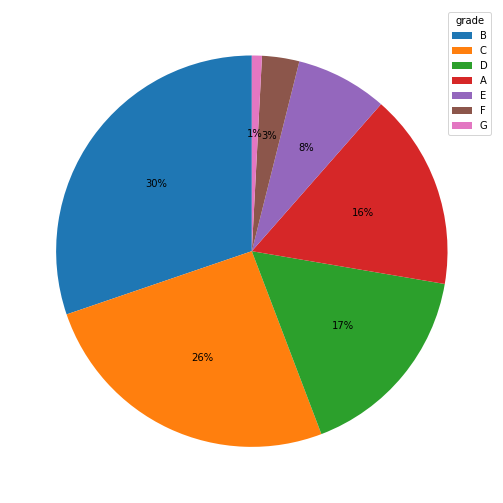

In [198]:
plt.figure(figsize=(9,9))
plt.pie(x=df['grade'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="grade", loc="upper right", labels=["B", "C", "D", "A", "E", "F", "G"])
plt.show()

In [199]:
df_plot_grade = df.groupby(['grade', 'loan_type']).size().reset_index().pivot(columns='grade', index='loan_type', values=0)

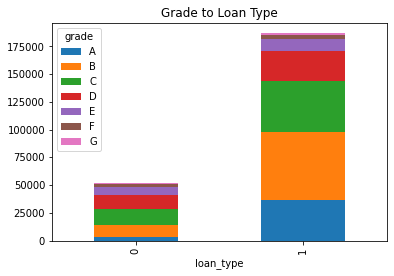

In [200]:
df_plot_grade.plot(title="Grade to Loan Type", kind='bar', stacked=True)

In [201]:
df.term = label_encoder.fit_transform(df.term)
df.grade = label_encoder.fit_transform(df.grade)
df.emp_title = label_encoder.fit_transform(df.emp_title)
df.home_ownership = label_encoder.fit_transform(df.home_ownership)
df.sub_grade = label_encoder.fit_transform(df.sub_grade)
df.verification_status = label_encoder.fit_transform(df.verification_status)
df.purpose = label_encoder.fit_transform(df.purpose)
df.zip_code = label_encoder.fit_transform(df.zip_code)
df.addr_state = label_encoder.fit_transform(df.addr_state)
df.earliest_cr_line = label_encoder.fit_transform(df.earliest_cr_line)
df.initial_list_status = label_encoder.fit_transform(df.initial_list_status)
df.last_credit_pull_d = label_encoder.fit_transform(df.last_credit_pull_d)
df.application_type = label_encoder.fit_transform(df.initial_list_status)
df.title = label_encoder.fit_transform(df.title)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


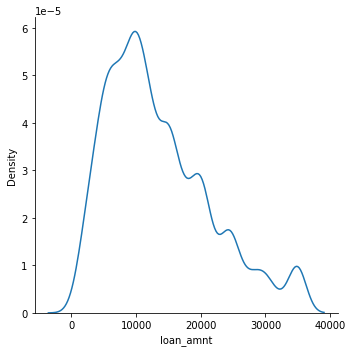

In [202]:
sns.displot(data=df, x="loan_amnt", kind="kde", bw_adjust=2)

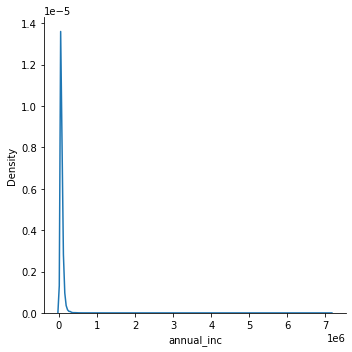

In [203]:
sns.displot(data=df, x="annual_inc", kind="kde", bw_adjust=2)

In [204]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                             int64
int_rate                       float64
installment                    float64
grade                            int64
sub_grade                        int64
emp_title                        int64
emp_length                     float64
home_ownership                   int64
annual_inc                     float64
verification_status              int64
purpose                          int64
title                            int64
zip_code                         int64
addr_state                       int64
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                 int64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [205]:
df.corr().loan_type

Unnamed: 0                    -0.068487
loan_amnt                     -0.074628
term                          -0.175030
int_rate                      -0.255543
installment                   -0.055635
grade                         -0.250580
sub_grade                     -0.256266
emp_title                     -0.048007
emp_length                    -0.004954
home_ownership                -0.048863
annual_inc                     0.060564
verification_status           -0.076695
purpose                       -0.019592
title                         -0.008083
zip_code                       0.020080
addr_state                    -0.006059
dti                           -0.128055
delinq_2yrs                   -0.030769
earliest_cr_line               0.008203
inq_last_6mths                -0.055260
mths_since_last_delinq         0.018477
mths_since_last_record        -0.006333
open_acc                      -0.027891
pub_rec                       -0.017209
revol_bal                      0.001998


In [206]:
uncorrelated = ['loan_amnt', 'installment', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 
                'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 
                'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 
                'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 
                'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df.drop(columns=uncorrelated, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [207]:
df.corr().loan_type

Unnamed: 0   -0.068487
term         -0.175030
int_rate     -0.255543
grade        -0.250580
sub_grade    -0.256266
dti          -0.128055
loan_type     1.000000
Name: loan_type, dtype: float64

Text(0.5, 0, 'term')

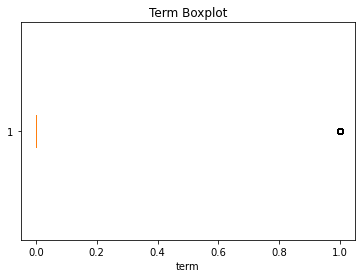

In [208]:
plt.boxplot(df['term'], vert=False)
plt.title("Term Boxplot")
plt.xlabel('term')

Text(0.5, 0, 'Int rate')

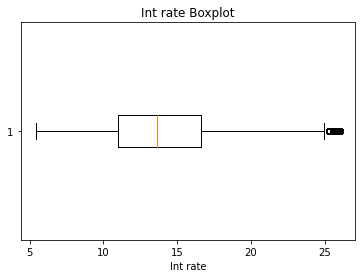

In [209]:
plt.boxplot(df['int_rate'], vert=False)
plt.title("Int rate Boxplot")
plt.xlabel('Int rate')

Text(0.5, 0, 'grade')

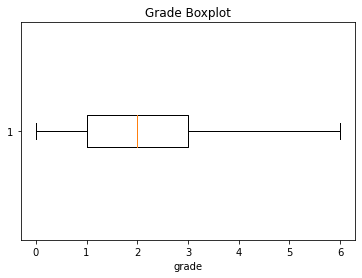

In [210]:
plt.boxplot(df['grade'], vert=False)
plt.title("Grade Boxplot")
plt.xlabel('grade')

Text(0.5, 0, 'sub_grade')

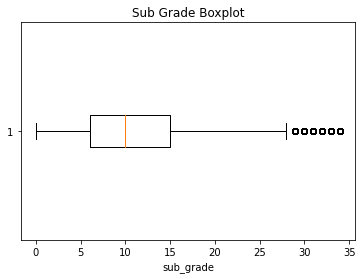

In [211]:
plt.boxplot(df['sub_grade'], vert=False)
plt.title("Sub Grade Boxplot")
plt.xlabel('sub_grade')

Text(0.5, 0, 'dti')

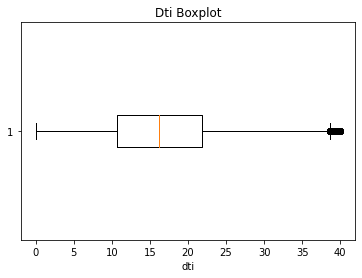

In [212]:
plt.boxplot(df['dti'], vert=False)
plt.title("Dti Boxplot")
plt.xlabel('dti')

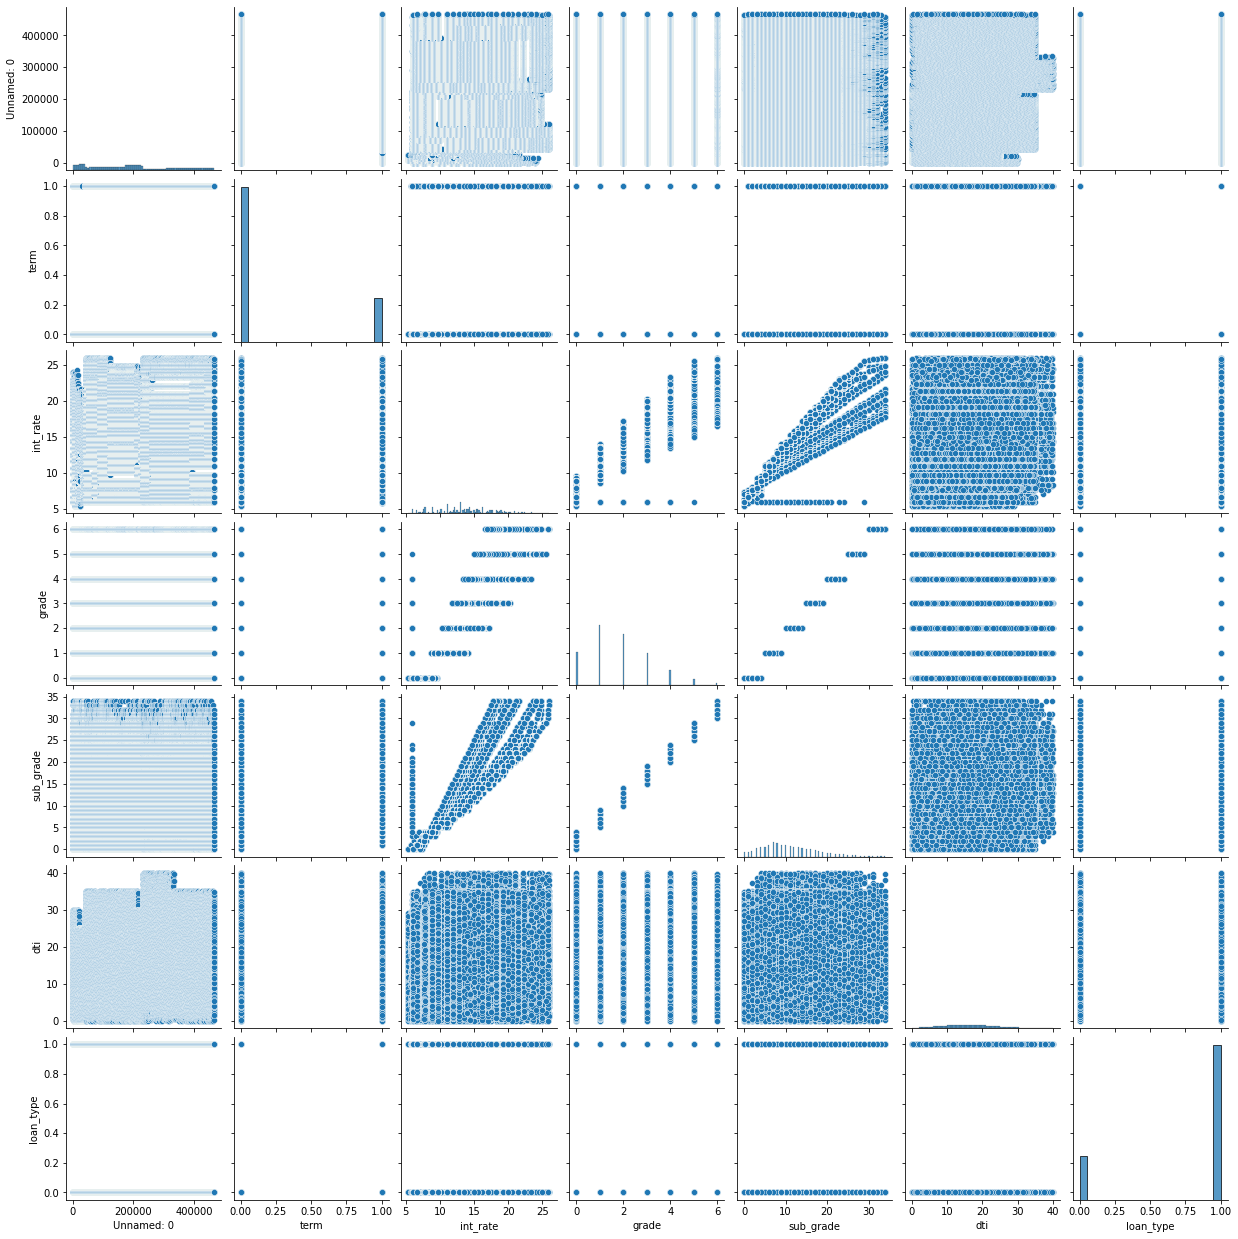

In [213]:
sns.pairplot(data=df)

In [214]:
from scipy import stats

In [215]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [216]:
df_class_0 = df[df.loan_type == 0]
df_class_1 = df[df.loan_type == 1]

In [217]:
count_class_1, count_class_0 = df.loan_type.value_counts()

In [218]:
count_class_1, count_class_0

(185646, 51213)

In [219]:
df_balance_1 = pd.concat([df_class_1[0:count_class_0], df_class_0], axis = 0)

In [220]:
df_balance_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102426 entries, 0 to 466281
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  102426 non-null  int64  
 1   term        102426 non-null  int64  
 2   int_rate    102426 non-null  float64
 3   grade       102426 non-null  int64  
 4   sub_grade   102426 non-null  int64  
 5   dti         102426 non-null  float64
 6   loan_type   102426 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 6.3 MB


In [221]:
df_balance_1.head

<bound method NDFrame.head of         Unnamed: 0  term  int_rate  grade  sub_grade    dti  loan_type
0                0     0     10.65      1          6  27.65          1
2                2     0     15.96      2         14   8.72          1
3                3     0     13.49      2         10  20.00          1
5                5     0      7.90      0          3  11.20          1
7                7     0     18.64      4         20   5.35          1
...            ...   ...       ...    ...        ...    ...        ...
466254      466254     1     23.40      4         24   1.50          0
466256      466256     0     16.99      3         15  24.39          0
466276      466276     1     18.25      3         17  12.28          0
466277      466277     0      7.90      0          3  10.33          0
466281      466281     1     19.97      3         19  18.45          0

[102426 rows x 7 columns]>

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV 

In [223]:
X = df_balance_1.drop("loan_type", axis = "columns")
y = df_balance_1["loan_type"]

In [224]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [226]:
lgc = LogisticRegression(n_jobs = -1)
param_grid =  {'C': [0.1,0.6,0.8], 
              'fit_intercept': [True,False],
              'solver': ['lbfgs','liblinear', 'sag', 'saga']}

clf_lg = RandomizedSearchCV(lgc, param_distributions = param_grid, n_iter = 20, cv = 3, verbose = 2)
tuned_lg = clf_lg.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   1.0s
[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   1.0s
[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   1.0s
[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.8s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   1.1s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   1.1s
[CV] END ..............C=0.1, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.1, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.1, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.1s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END ............C=0.1, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.8s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   1.1s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   1.2s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.8s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   1.1s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   1.1s
[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.1s
[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.8, fit_intercept=False, solver=liblinear; total time=   0.1s
[CV] END .......C=0.8, fit_intercept=False, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.8, fit_intercept=False, solver=liblinear; total time=   0.1s


In [227]:
y_pred1 = tuned_lg.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     10243
           1       0.79      0.83      0.81     10243

    accuracy                           0.80     20486
   macro avg       0.80      0.80      0.80     20486
weighted avg       0.80      0.80      0.80     20486



In [228]:
y_pred1[5]

0

In [229]:
df_balance_2 = pd.concat([df_class_1[count_class_0:count_class_0*2], df_class_0], axis = 0)

In [230]:
df_balance_2.head

<bound method NDFrame.head of         Unnamed: 0  term  int_rate  grade  sub_grade    dti  loan_type
90286        90286     0     15.10      2         11  29.66          1
90289        90289     0     14.30      2         10  11.40          1
90293        90293     0     11.99      1          7  18.65          1
90297        90297     1     17.10      2         14  22.35          1
90298        90298     1     17.10      2         14  17.22          1
...            ...   ...       ...    ...        ...    ...        ...
466254      466254     1     23.40      4         24   1.50          0
466256      466256     0     16.99      3         15  24.39          0
466276      466276     1     18.25      3         17  12.28          0
466277      466277     0      7.90      0          3  10.33          0
466281      466281     1     19.97      3         19  18.45          0

[102426 rows x 7 columns]>

In [231]:
X = df_balance_2.drop("loan_type", axis = "columns")
y = df_balance_2["loan_type"]

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [233]:
lgc = LogisticRegression(n_jobs = -1)
param_grid =  {'C': [0.1,0.6,0.8], 
              'fit_intercept': [True,False],
              'solver': ['lbfgs','liblinear', 'sag', 'saga']}

clf_lg = RandomizedSearchCV(lgc, param_distributions = param_grid, n_iter = 20, cv = 3, verbose = 2)
tuned_lg = clf_lg.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.1s
[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.6, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.6, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.6, fit_intercept=True, solver=sag; total time=   0.9s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.6, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.6, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.6, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END .............C=0.1,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.1s
[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .............C=0.6, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.6, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.6, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END ............C=0.1, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.1, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.1, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END .............C=0.8, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END .............C=0.8, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END .............C=0.8, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END ............C=0.8, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.1s
[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ...........C=0.1, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.1, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.1, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.6s


In [234]:
y_pred2 = tuned_lg.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10243
           1       0.00      0.00      0.00     10243

    accuracy                           0.50     20486
   macro avg       0.25      0.50      0.33     20486
weighted avg       0.25      0.50      0.33     20486



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
df_balance_3 = pd.concat([df_class_1[count_class_0*2:153639], df_class_0], axis = 0)

In [236]:
df_balance_3.head

<bound method NDFrame.head of         Unnamed: 0  term  int_rate  grade  sub_grade    dti  loan_type
193448      193448     0     19.72      3         19   4.97          1
193450      193450     0     15.31      2         11  15.89          1
193451      193451     0     14.33      2         10  30.93          1
193452      193452     0     18.75      3         17   6.33          1
193453      193453     0     13.11      1          8  20.55          1
...            ...   ...       ...    ...        ...    ...        ...
466254      466254     1     23.40      4         24   1.50          0
466256      466256     0     16.99      3         15  24.39          0
466276      466276     1     18.25      3         17  12.28          0
466277      466277     0      7.90      0          3  10.33          0
466281      466281     1     19.97      3         19  18.45          0

[102426 rows x 7 columns]>

In [237]:
X = df_balance_3.drop("loan_type", axis = "columns")
y = df_balance_3["loan_type"]

In [238]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [239]:
lgc = LogisticRegression(n_jobs = -1)
param_grid =  {'C': [0.1,0.6,0.8], 
              'fit_intercept': [True,False],
              'solver': ['lbfgs','liblinear', 'sag', 'saga']}

clf_lg = RandomizedSearchCV(lgc, param_distributions = param_grid, n_iter = 20, cv = 3, verbose = 2)
tuned_lg = clf_lg.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ............C=0.8, fit_intercept=False, solver=saga; total time=   1.0s
[CV] END ............C=0.8, fit_intercept=False, solver=saga; total time=   1.0s
[CV] END ............C=0.8, fit_intercept=False, solver=saga; total time=   1.0s
[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.2s
[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.8, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.8, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.8, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.2s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.8, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .......C=0.8, fit_intercept=False, solver=liblinear; total time=   0.2s
[CV] END .......C=0.8, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   0.8s
[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   0.8s
[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.0s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.6s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.1s
[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.0s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.2s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END ............C=0.8, fit_intercept=True, solver=lbfgs; total time=   0.6s
[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   0.9s
[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   1.0s
[CV] END ............C=0.1, fit_intercept=False, solver=saga; total time=   1.0s
[CV] END ............C=0.1, fit_intercept=False, solver=saga; total time=   1.4s
[CV] END ............C=0.1, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


In [240]:
y_pred3 = tuned_lg.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     10243
           1       0.67      0.68      0.67     10243

    accuracy                           0.67     20486
   macro avg       0.67      0.67      0.67     20486
weighted avg       0.67      0.67      0.67     20486



In [241]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  class_pred = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if class_pred > 1:
    y_pred_final[i] = 1
  
  else:
    y_pred_final[i] = 0

In [242]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81     10243
           1       1.00      0.55      0.71     10243

    accuracy                           0.77     20486
   macro avg       0.84      0.77      0.76     20486
weighted avg       0.84      0.77      0.76     20486



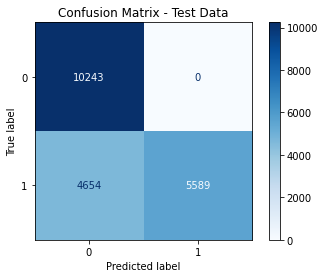

In [243]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tuned_lg.classes_)
disp.plot(cmap='Blues', include_values=True, values_format='d')
plt.title("Confusion Matrix - Test Data")
plt.show()

# **Conclusion**

As you can see now, we are using undersampling method to create this model. We divide the data into three parts and created model (logistic regressor) for each of them.

1. The first model got the biggest accuracy out of all these three, but its accuracy is irrelevant because of the data we use is only parts of 1/3 full data.

2. The second model has an awful score as we could expect, but it's also not the final accuracy

3. The third model has a better score than the last before, but it is only slightly improved

4. By combining all of three model we can get some amazing some opposite. As you can see we got 69 precision on class 0 but 100 on class 1. We can also see that the recall we got for class 0 is 100 and 55 for class 1, but the f1 score from both is not much different each other. And lastly we got 77 score from the highest of 80.